In [ ]:
%pip install -qU langchain umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub chromadb langchain-anthropic matplotlib 
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
%pip install beautifulsoup4

  Using cached beautifulsoup4-4.13.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.13.3-py3-none-any.whl (186 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup
import tiktoken
import matplotlib.pyplot as plt

# Returns the number of tokens in the given string.
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [2]:
# Loading LCEL Documents
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

In [3]:
# Loading LCEL Documents Using PydanticOutputParser (External LCEL Documents)
url = "https://python.langchain.com/docs/how_to/output_parser_structured/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

In [4]:
# Loading External LCEL Documents Using Self-Query Retriever
url = "https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

In [5]:
# Document Text
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

In [6]:
# Calculating Token Count for Each Document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

<function matplotlib.pyplot.show(close=None, block=None)>

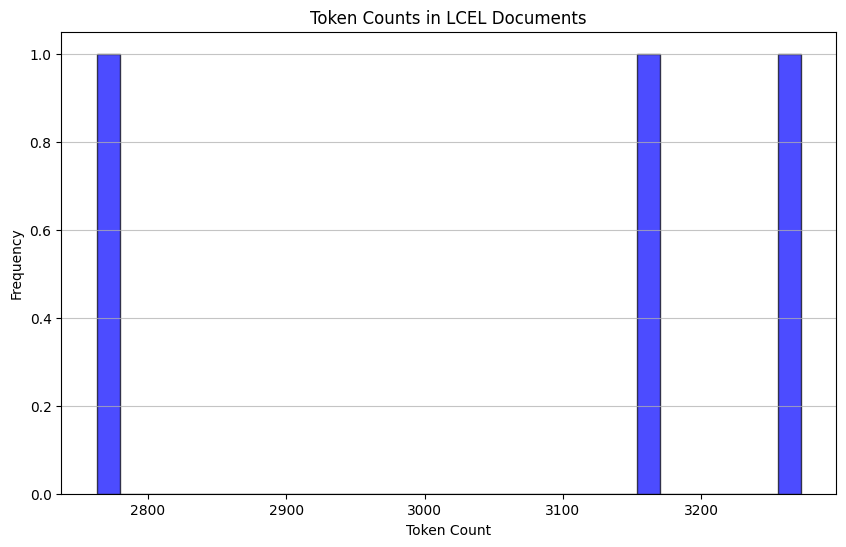

In [7]:
# Plotting a Histogram of Token Counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Token Counts in LCEL Documents")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Displaying the Histogram
plt.show